#### IMPORTAÇÃO DAS BIBLIOTECAS

In [1]:
# DEFINIÇÃO DA SEMENTE ALEATÓRIA
import random
from datetime import datetime
st = datetime.now()

random.seed(42)
seed = 42

# IMPORTAÇÃO DOS PACOTES PARA A MANIPULAÇÃO DE DADOS
import pandas as pd
pd.options.display.max_rows = 250

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder


# IMPORTAÇÃO DOS PACOTES PARA A MODELAGEM DE DADOS
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso


# IMPORTAÇÃO DOS PACOTES PARA A AVALIAÇÃO DE PERFORMANCE DOS MODELOS
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import plot_roc_curve

### IMPORTAÇÃO DA BASE PARA TRATAMENTO

In [2]:
# LEITURA DO ARQUIVO 'WINE'
wines = pd.read_csv('winequality-red.csv', sep=';')

print('Número de linhas e colunas carregados: ', wines.shape)
attributes = list(wines.columns)

wines.head(3)

Número de linhas e colunas carregados:  (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [3]:
attributes

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

#### EXPLORATÓRIA DA BASE

In [4]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
wines.isnull().sum().sort_values(ascending=False)

quality                 0
alcohol                 0
sulphates               0
pH                      0
density                 0
total sulfur dioxide    0
free sulfur dioxide     0
chlorides               0
residual sugar          0
citric acid             0
volatile acidity        0
fixed acidity           0
dtype: int64

In [6]:
qualidade = wines.groupby('quality')['quality'].count().to_frame(name='FREQ').reset_index()

print('Os vinhos podem ser categorizados em', qualidade.shape[0], 'níveis de qualidade')
print('Temos como distribuição entre os níveis de qualidade os seguintes valores: \n\n', qualidade)

Os vinhos podem ser categorizados em 6 níveis de qualidade
Temos como distribuição entre os níveis de qualidade os seguintes valores: 

    quality  FREQ
0        3    10
1        4    53
2        5   681
3        6   638
4        7   199
5        8    18


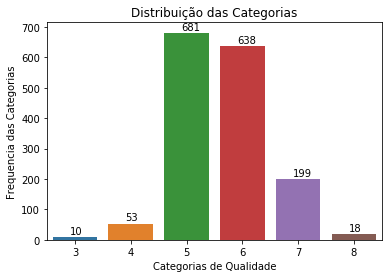

In [7]:
%matplotlib inline

sns.countplot(x = 'quality', data=wines)
plt.title('Distribuição das Categorias')
plt.xlabel('Categorias de Qualidade')
plt.ylabel('Frequencia das Categorias')

for posicao, valor in zip(qualidade['quality'], qualidade['FREQ']):
    plt.text(posicao-3.1, valor+10, str(valor), color='black')
    
plt.show()



In [8]:
bins = (min(wines['quality'])-1, 6.5, max(wines['quality']))
labels = ['bad', 'good']

wines['quality'] = pd.cut(x = wines['quality'], bins=bins, labels=labels)

print(wines.groupby('quality')['quality'].count().to_frame(name='FREQ').reset_index())

wines['quality'] = LabelEncoder().fit_transform(wines['quality'])

target = wines.groupby('quality')['quality'].count().to_frame(name='FREQ').reset_index()

print('\nOs vinhos podem ser categorizados em', target.shape[0], 'níveis de qualidade')
print('Temos como distribuição entre os níveis de qualidade os seguintes valores: \n\n')
target


quality  FREQ
0     bad  1382
1    good   217

Os vinhos podem ser categorizados em 2 níveis de qualidade
Temos como distribuição entre os níveis de qualidade os seguintes valores: 




,quality,FREQ
0,0,1382
1,1,217


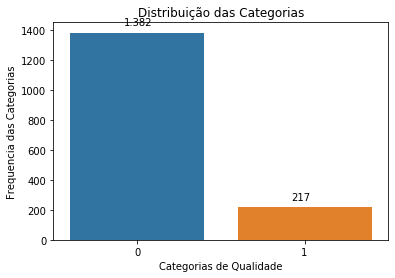

In [9]:
ax = sns.countplot(wines['quality'])
plt.title('Distribuição das Categorias')
plt.xlabel('Categorias de Qualidade')
plt.ylabel('Frequencia das Categorias')

for p in ax.patches:
        ax.annotate('{:,.0f}'.format(p.get_height()).replace(',','.'), (p.get_x()+0.32, p.get_height()+50))

In [10]:
def detecta_outliers(df, variable):
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3 - q1
    matches = ((df[variable] < (q1 - 1.5 * iqr)) | (df[variable] > (q3 + 1.5 * iqr)))
    return df.loc[matches, variable]

In [11]:
def variableOutlier():
    statistic = pd.DataFrame()
    
    for variavel in attributes:
        if variavel != 'quality':
            x = detecta_outliers(wines, variavel).describe().to_frame(name=variavel)

            statistic = pd.concat([statistic, x], axis=1) 
    
    return statistic

In [12]:
outliers = variableOutlier()
print('Foram classificados como Outliers o total de', '{:,.0f}'.format(outliers.loc['count',:].sum()), 'registros (utilizando a regra IQR), sendo que os mesmos não foram removidos para não descaracterizar a base.\n')
outliers

Foram classificados como Outliers o total de 573 registros (utilizando a regra IQR), sendo que os mesmos não foram removidos para não descaracterizar a base.



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,49.000000,19.000000,1.0,155.000000,112.000000,30.000000,55.000000,45.000000,35.000000,59.000000,13.000000
mean,13.287755,1.132105,1.0,5.882903,0.203116,51.900000,143.890909,0.997164,3.415714,1.225424,13.912821
std,0.998881,0.148738,NaN,2.504726,0.120084,7.617358,29.113235,0.005580,0.448653,0.251967,0.358117
min,12.400000,1.020000,1.0,3.700000,0.012000,43.000000,124.000000,0.990070,2.740000,1.000000,13.566667
25%,12.600000,1.030000,1.0,4.200000,0.124000,47.250000,130.500000,0.991600,2.895000,1.060000,13.600000
50%,12.900000,1.070000,1.0,5.200000,0.166000,51.000000,140.000000,1.001400,3.690000,1.140000,14.000000
75%,13.500000,1.182500,1.0,6.350000,0.237250,53.750000,147.000000,1.002200,3.730000,1.280000,14.000000
max,15.900000,1.580000,1.0,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [13]:
# from datetime import datetime
# st = datetime.now()
# import seaborn as sns
# %matplotlib inline

# sns.pairplot(wines)
# plt.show()
# en = datetime.now()
# print(en-st)

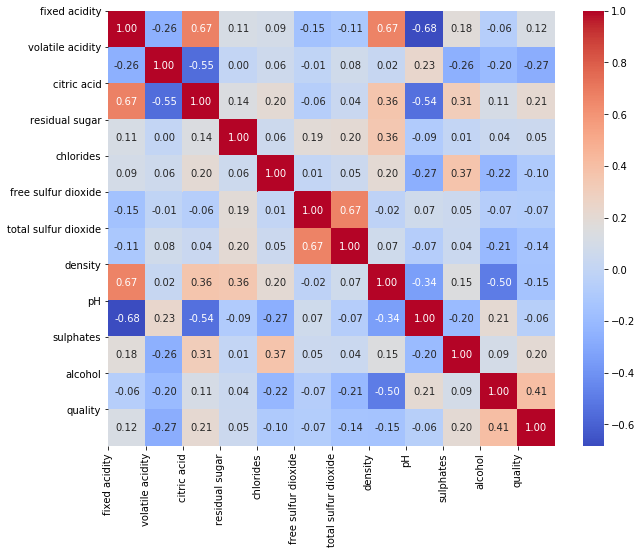

In [14]:
corr = wines.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()



In [15]:
wines_np = wines.to_numpy()
nrow,ncol = wines_np.shape
X = wines_np[:,0:ncol-1]
y = wines_np[:,-1]


In [16]:
print('Dados antes da transformação:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

print(100*'-')
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados antes da transformação:
Media:  [ 8.31963727  0.52782051  0.27097561  2.5388055   0.08746654 15.87492183
 46.46779237  0.99674668  3.3111132   0.65814884 10.42298311]
Desvio Padrao: [1.74055180e+00 1.79003704e-01 1.94740214e-01 1.40948711e+00
 4.70505826e-02 1.04568856e+01 3.28850367e+01 1.88674370e-03
 1.54338181e-01 1.69453967e-01 1.06533430e+00]
----------------------------------------------------------------------------------------------------
Dados transformados:
Media:  [ 3.55493551e-16  1.73303106e-16 -8.88733878e-17 -1.24422743e-16
  3.91042906e-16 -6.22113715e-17  4.44366939e-17  2.36403212e-14
  2.86172309e-15  6.75437748e-16  1.06648065e-16]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [17]:
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = seed)

In [18]:
print('Base de Treinamento - X: ', x_train.shape)
print('Base de Treinamento - Y: ', y_train.shape)

print('Base de Teste - X: ', x_test.shape)
print('Base de Teste - Y: ', y_test.shape)

Base de Treinamento - X:  (1279, 11)
Base de Treinamento - Y:  (1279,)
Base de Teste - X:  (320, 11)
Base de Teste - Y:  (320,)


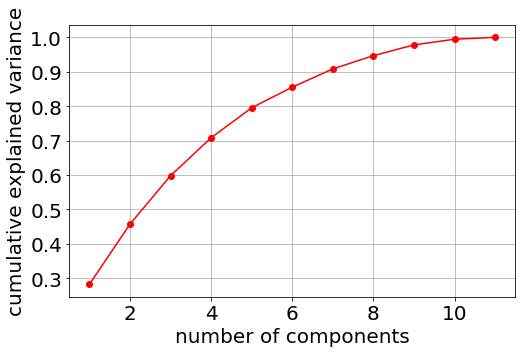

In [19]:
n_components_values = np.arange(1, len(attributes))

# instanciamos o PCA sem especificar o numero de componentes que desejamos
# em seguida ajustamos ao nosso conjunto de dados
pca = PCA().fit(X)

# mostra a variância acumulada para todos os possiveis numeros de componentes
# Notamos que com apenas duas variaveis conseguimos explicar 95% da variancia dos dados
plt.figure(figsize=(8, 5))
plt.plot(n_components_values, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.grid(True)
plt.show(True)

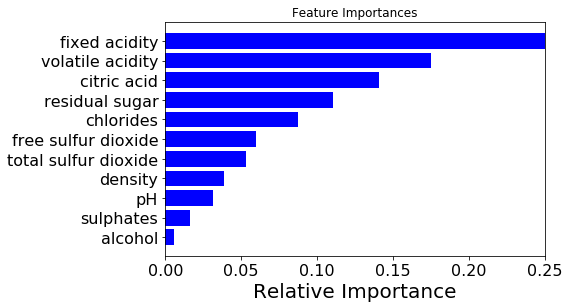

In [20]:
var_exp = pca.explained_variance_ratio_

importances = var_exp
indices = np.argsort(importances)
attributes_rank = []
for i in indices:
    attributes_rank.append(attributes[i])
plt.title('Feature Importances')
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=20)
plt.xlabel('Relative Importance',fontsize=20)
plt.xticks(color='k', size=16)
plt.yticks(color='k', size=16)
plt.xlim([0.0, 0.25])
plt.show()

In [21]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

BEST K: 1 
 
AUC: 0.78 
ACCURACY: 0.89 
PRECISION SCORE: 0.77


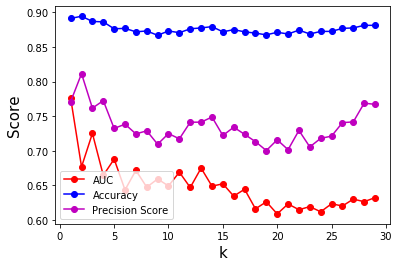

In [22]:
mauc = []
macc = []
mprc = []
vk = []

for k in range(1, 30):
    vauc = []
    vacc = []
    vprc = []

    for train_index, test_index in cv.split(X, y):
        # select rows
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test) 
        
        vauc.append(roc_auc_score(y_test, y_pred))
        vacc.append(accuracy_score(y_pred, y_test))
        vprc.append(precision_score(y_test, y_pred, average='macro'))

    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    mprc.append(np.mean(vprc))
    vk.append(k)

best_k = np.argmax(mauc)+1
print('BEST K:', best_k, '\n',\
    '\nAUC:', round(mauc[best_k-1], 2), \
    '\nACCURACY:', round(macc[best_k-1], 2), \
    '\nPRECISION SCORE:', round(mprc[best_k-1],2))

# plt.figure(figsize=(10,5))
plt.plot(vk, mauc, '-ro', label= 'AUC')
plt.plot(vk, macc, '-bo', label = 'Accuracy')
plt.plot(vk, mprc, '-mo', label = 'Precision Score')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

In [23]:
model = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 

print('Accuracy:', round(accuracy_score(y_pred, y_test),2))
print('F1 score:', round(f1_score(y_test, y_pred, average="macro"),2))
print('Precision:', round(precision_score(y_test, y_pred, average="macro"),2))
print('Recall:', round(recall_score(y_test, y_pred, average="macro"), 2))

Accuracy: 0.9
F1 score: 0.78
Precision: 0.78
Recall: 0.78


In [24]:
model = tree.DecisionTreeClassifier(criterion = 'entropy',random_state = seed)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print('Accuracy (ENTROPY): \t{}'.format(model.score(x_test, y_test)))

Accuracy (ENTROPY): 	0.8805031446540881


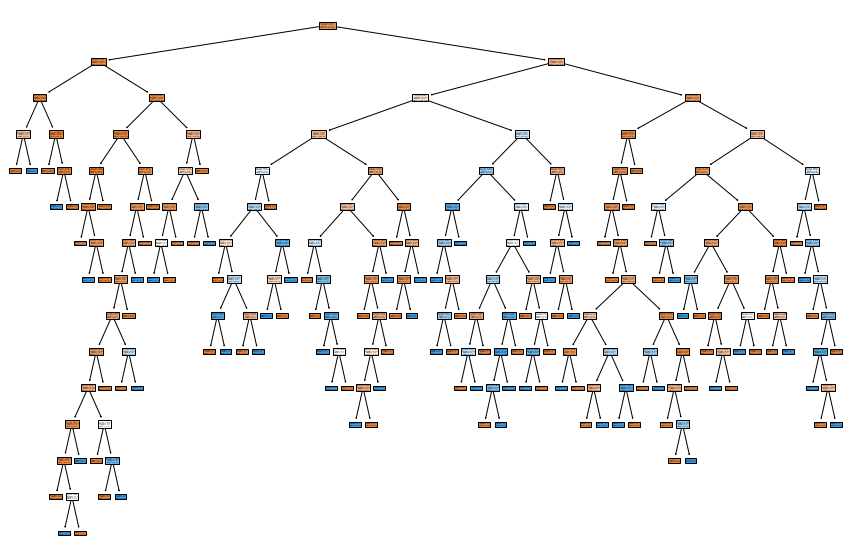

In [25]:
plt.figure(figsize=(15,10))
tree.plot_tree(model.fit(x_train,y_train),filled=True)
plt.show(True)

In [26]:
model = tree.DecisionTreeClassifier(criterion = 'gini',random_state = seed)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print('Accuracy (GINI): \t{}'.format(model.score(x_test, y_test)))

Accuracy (GINI): 	0.9119496855345912


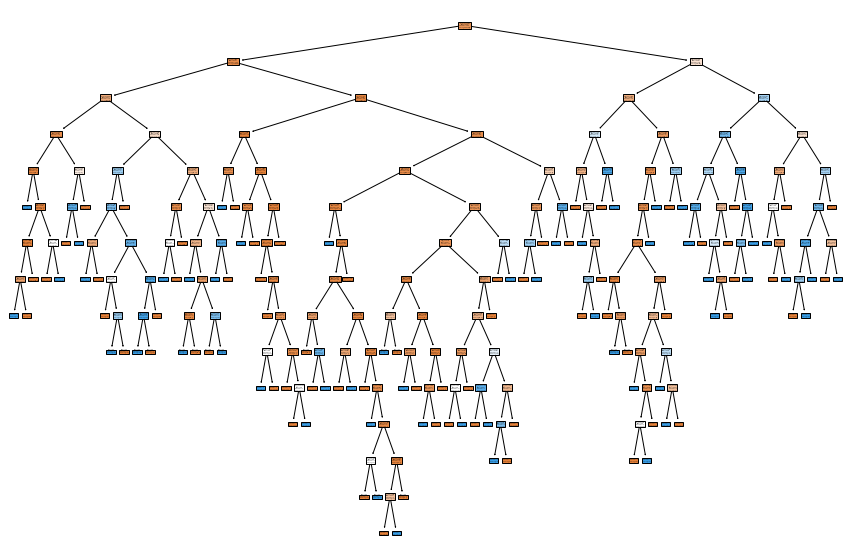

In [27]:
plt.figure(figsize=(15,10))
tree.plot_tree(model.fit(x_train,y_train),filled=True)
plt.show(True)

In [28]:
models = [
    ('Naive Bayes - Gaussian', GaussianNB()),
    ('Naive Bayes - Bernoulli', BernoulliNB())
]

for name, model in models:
    model.fit(x_train, y_train)
    print('Accuracy ({}): \t{}'.format(name, model.score(x_test, y_test)))

Accuracy (Naive Bayes - Gaussian): 	0.8805031446540881
Accuracy (Naive Bayes - Bernoulli): 	0.8553459119496856


In [29]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

Melhor c: 26  AUC: 0.7492679148606579  ACCURACY: 0.9012264150943397


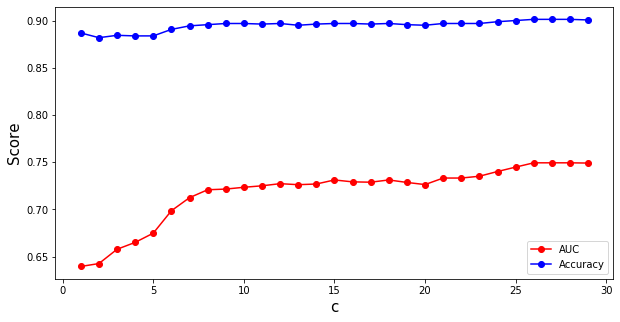

In [30]:
sacc = []
sauc = []
vc = []

for c in range(1, 30):
    mauc = []
    macc = []
    for train_index, test_index in cv.split(X, y):
        # select rows
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = SVC(C = c, gamma = 'auto', random_state=seed)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test) 
        score = accuracy_score(y_pred, y_test)

        mauc.append(roc_auc_score(y_test, y_pred))
        macc.append(accuracy_score(y_pred, y_test))

    sacc.append(np.mean(macc))
    sauc.append(np.mean(mauc))
    vc.append(c)

best_c = np.argmax(sauc)+1
print('Melhor c:', best_c, ' AUC:',sauc[np.argmax(sauc)], ' ACCURACY:', sacc[np.argmax(sacc)])
plt.figure(figsize=(10,5))
plt.plot(vc, sauc, '-ro', label= 'AUC')
plt.plot(vc, sacc, '-bo', label = 'Accuracy')
plt.xlabel('c', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

In [31]:
model = SVC(C = best_c, gamma = 'auto')
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 

print('Accuracy:', round(accuracy_score(y_pred, y_test),2))
print('F1 score:', round(f1_score(y_test, y_pred, average="macro"),2))
print('Precision:', round(precision_score(y_test, y_pred, average="macro"),2))
print('Recall:', round(recall_score(y_test, y_pred, average="macro"), 2))

Accuracy: 0.96
F1 score: 0.91
Precision: 0.93
Recall: 0.9


Melhor n: 51  com acurácia: 0.9433962264150944  e precisão: 0.8953900709219859


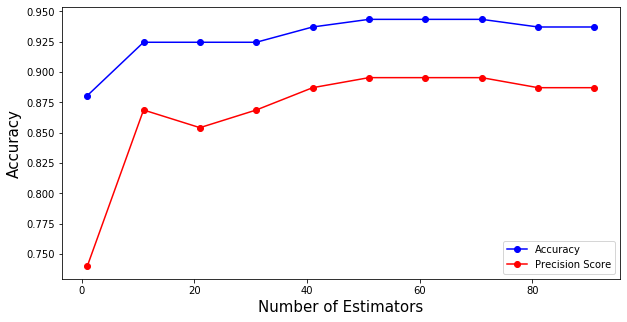

In [32]:
vscore = []
pscore = []
vn = []

for n in range(1,100,10):
    
    model = RandomForestClassifier(n_estimators=n, random_state=seed)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    
    score = accuracy_score(y_pred, y_test)
    precision = precision_score(y_test, y_pred, average='macro')
    
    # print('Number of Estimators:', n, 'Accuracy:', score)
    pscore.append(precision)
    vscore.append(score)
    vn.append(n)

best_n = vn[np.argmax(vscore)]
print('Melhor n:', best_n, ' com acurácia:', vscore[np.argmax(vscore)], ' e precisão:', pscore[np.argmax(pscore)] )

plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo', Label='Accuracy')
plt.plot(vn, pscore, '-ro', Label='Precision Score')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend()
plt.show()


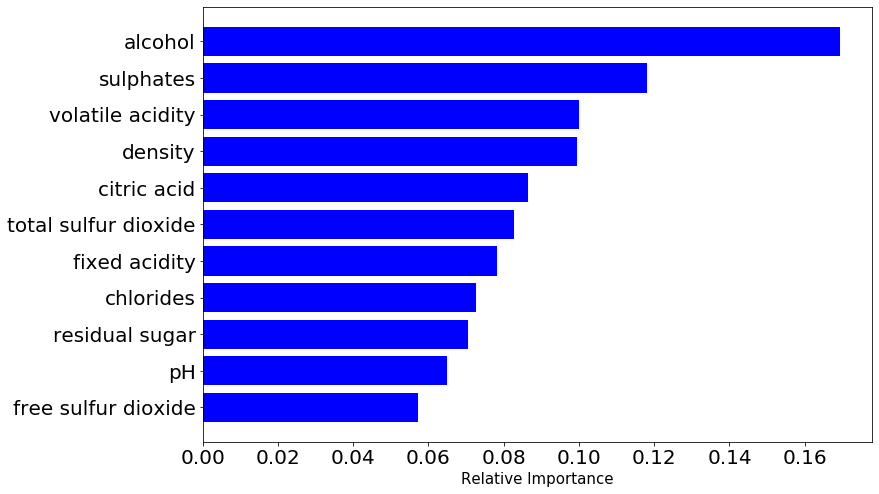

In [33]:
importances = model.feature_importances_
indices = np.argsort(importances)
lmeas_order = []
for i in indices:
    lmeas_order.append(attributes[i])
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), lmeas_order, fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show()

In [34]:
models = [
    ('KNN - N Neighbors = 1', KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')),
    ('Decision Tree - Criterion = GINI', tree.DecisionTreeClassifier(criterion = 'gini',random_state = seed)),
    ('Naive Bayes - Gaussian', GaussianNB()),
    ('SVC - C = 26', SVC(C = 26, gamma = 'auto')),
    ('Random Forest - N Estimators = 51', RandomForestClassifier(n_estimators=51, random_state=seed))
]

for name, model in models:
    model.fit(x_train, y_train)
    print('Accuracy ({}): \t{}'.format(name, model.score(x_test, y_test)))

Accuracy (KNN - N Neighbors = 1): 	0.89937106918239
Accuracy (Decision Tree - Criterion = GINI): 	0.9119496855345912
Accuracy (Naive Bayes - Gaussian): 	0.8805031446540881
Accuracy (SVC - C = 26): 	0.9622641509433962
Accuracy (Random Forest - N Estimators = 51): 	0.9433962264150944


#### REGRESSÃO

In [35]:
nrow,ncol = wines_np.shape
print(wines_np.shape)

(1599, 12)


In [36]:
X = wines_np[:,0:ncol-2]
y = wines_np[:,-2]

p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = seed)

ErroQuadraticoMédio:  0.3657588633154706 
R2 Score:  0.7062008191714115


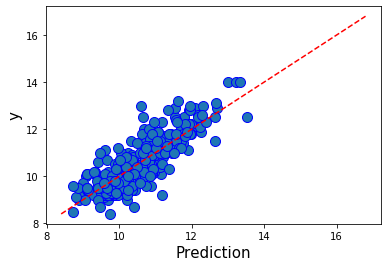

In [37]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

score = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('ErroQuadraticoMédio: ', score, \
      '\nR2 Score: ', r2)

# mostra os resultados
fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

Best alpha:  0.5  R2:  0.7062008191714081


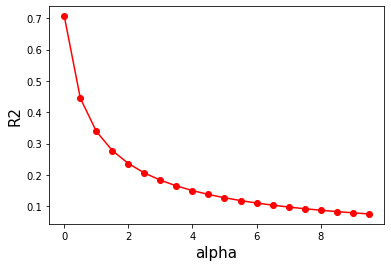

In [57]:
vR2 = []
valpha = []
# variamos os valores de alpha
for alpha in np.arange(0,10,0.5):
    ridge2 = Ridge(alpha = alpha, normalize = True)
    ridge2.fit(x_train, y_train)             # Fit a ridge regression on the training data
    y_pred = ridge2.predict(x_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)

bAlpha = valpha[np.argmax(vR2)+1]
print('Best alpha: ', bAlpha, ' R2: ', vR2[np.argmax(vR2)])

plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

In [58]:
lasso = Lasso(alpha=bAlpha,normalize=True, max_iter=1e5)
lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
y_pred = lasso.predict(x_test)           # Use this model to predict the test data
RSME = mean_squared_error(y_test, y_pred)         # Calculate the test MSE
print('RSME:', RSME)

RSME: 1.2455234811845255


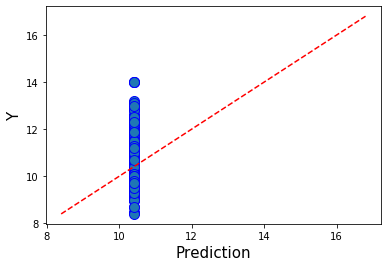

In [59]:
fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("Y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

#plt.grid(True)
plt.show(True)

Best alpha:  0.11  R2:  0.7002709356691422


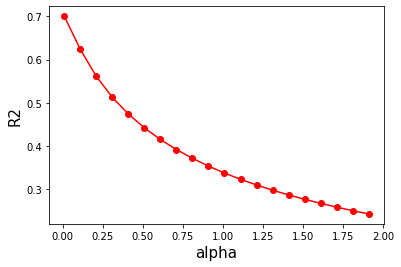

In [60]:
vR2 = []
valpha = []
for alpha in np.arange(0.01,2,0.1):
# ajusta o modelo ridge regression
    ridge2 = Ridge(alpha = alpha, normalize = True)
    ridge2.fit(x_train, y_train)             # Fit a ridge regression on the training data
    y_pred = ridge2.predict(x_test)
    r2 = r2_score(y_test, y_pred)

    vR2.append(r2)
    valpha.append(alpha)

bAlpha = valpha[np.argmax(vR2)+1]
print('Best alpha: ', bAlpha, ' R2: ', vR2[np.argmax(vR2)])

plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

In [61]:
# ajusta o modelo ridge regression
ridge2 = Ridge(alpha = bAlpha, normalize = True)
ridge2.fit(x_train, y_train)             # Fit a ridge regression on the training data
y_pred = ridge2.predict(x_test)           # Use this model to predict the test data
RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME)          # Calculate the test MSE

RSME: 0.4685502112066054


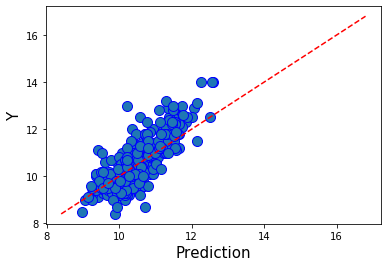

In [62]:
fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("Y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

#plt.grid(True)
plt.show(True)

In [63]:
eq0 = [ x for x in lasso.coef_ if x == 0]
len(eq0)

10

In [45]:
en = datetime.now()
print(en-st)

0:01:46.176179
